In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import plotly.express as px
import warnings as ws
ws.filterwarnings("ignore")

# Loading the world data

In [2]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# EDA

In [3]:
world_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
world_data.tail()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [5]:
world_data.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.324346e+07,4.934739e+05
std,1.513543e+08,2.019326e+06
min,1.400000e+02,1.600000e+01
25%,3.301000e+06,1.346900e+04
50%,1.019232e+07,5.040000e+04
75%,3.182530e+07,2.619210e+05
max,1.397715e+09,2.143323e+07


In [6]:
list(world_data.columns)

['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry']

In [7]:
world_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [8]:
world_data.shape

(177, 6)

# 2-D representation of the continents

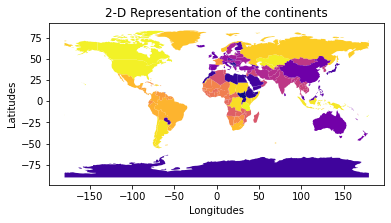

In [53]:

world_data.plot(cmap ='plasma_r')
plt.title("2-D Representation of the continents")
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.savefig("Earth.png")
plt.show() 

In [40]:
world_data.continent

0            Oceania
1             Africa
2             Africa
3      North America
4      North America
           ...      
172           Europe
173           Europe
174           Europe
175    North America
176           Africa
Name: continent, Length: 177, dtype: object

# Iterating continental maps

<Figure size 432x288 with 0 Axes>

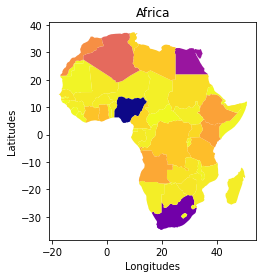

<Figure size 432x288 with 0 Axes>

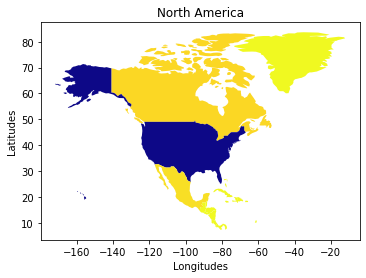

<Figure size 432x288 with 0 Axes>

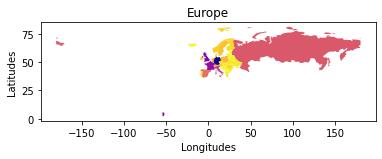

<Figure size 432x288 with 0 Axes>

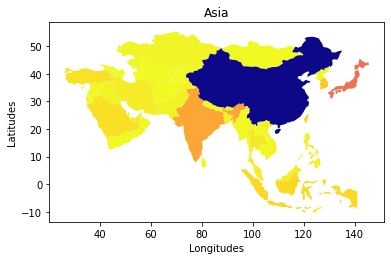

<Figure size 432x288 with 0 Axes>

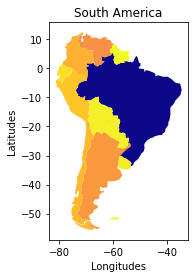

<Figure size 432x288 with 0 Axes>

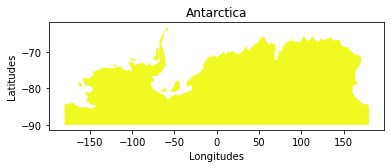

<Figure size 432x288 with 0 Axes>

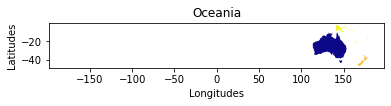

In [41]:
Cont = ["Africa","North America", "Europe", "Asia","South America", "Antarctica","Oceania" ]

for i in Cont:
    plt.figure(i)
    world_parts = world_data[world_data.continent == i]
    world_parts.plot(column ='gdp_md_est', cmap ='plasma_r');
    plt.title(i)
    plt.xlabel("Longitudes")
    plt.ylabel("Latitudes")
    plt.show()

# Population percentage contribution

In [52]:
px.pie(names=list(world_data.continent), values=world_data.pop_est.values, title="Continental population percentage estimatates")



In [44]:
world_data.gdp_md_est

0          5496
1         63177
2           907
3       1736425
4      21433226
         ...   
172       51475
173        5542
174        7926
175       24269
176       11998
Name: gdp_md_est, Length: 177, dtype: int64

In [51]:
px.pie(names=list(world_data.continent), values=world_data.gdp_md_est, title="Continental GDP percentage estimatates")


# GDP and Population dataframe cresation

In [46]:
dict= {"Continent": world_data["continent"],"P": world_data["pop_est"], "GDP":world_data["gdp_md_est"]}

D=pd.DataFrame(dict)

In [47]:
S=D.set_index("Continent")
print(S)

                         P       GDP
Continent                           
Oceania           889953.0      5496
Africa          58005463.0     63177
Africa            603253.0       907
North America   37589262.0   1736425
North America  328239523.0  21433226
...                    ...       ...
Europe           6944975.0     51475
Europe            622137.0      5542
Europe           1794248.0      7926
North America    1394973.0     24269
Africa          11062113.0     11998

[177 rows x 2 columns]


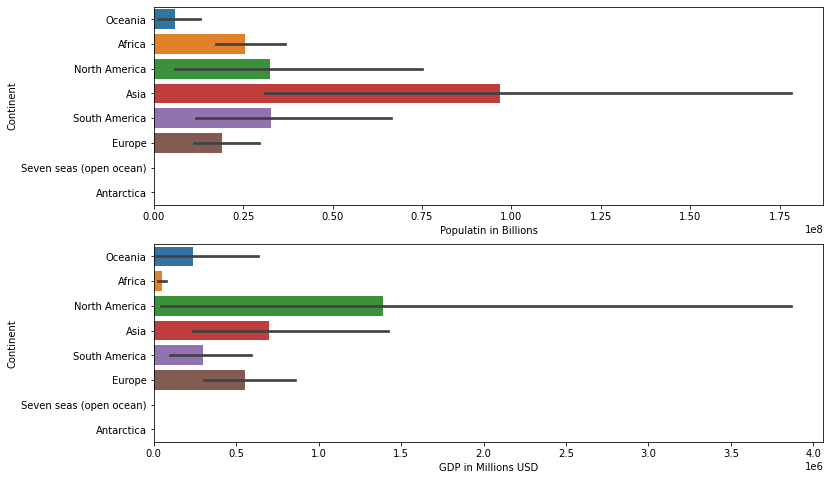

In [50]:
fig,ax = plt.subplots(figsize=(12,8))

ax1=plt.subplot(211)
sns.barplot(data=D,x=D.P,y=D.Continent)
#plt.title("Continetal Population estimates\n")
plt.xlabel("Populatin in Billions")

ax2=plt.subplot(212)
sns.barplot(data=D,x=D.GDP,y=D.Continent)
#plt.title("Continetal GDG\n")
plt.xlabel("GDP in Millions USD");
